In [259]:
import torch

## STEP 1. 데이터 모으기

In [260]:
# case 1
# N=20
# random0=torch.randn(int(N/2),1)
# random5=torch.randn(int(N/2),1)+5
# class1_data=torch.hstack([random0,random5])
# class2_data=torch.hstack([random5,random0])
# class1_label=torch.ones(int(N/2),1)
# class2_label=torch.zeros(int(N/2),1)
# X=torch.vstack([class1_data,class2_data])
# y=torch.vstack([class1_label,class2_label])

# # case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

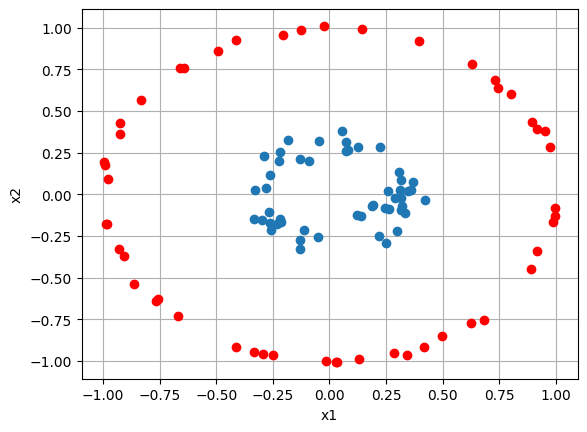

In [261]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP 2. 모델 만들기

In [262]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        # self.linear = nn.Sequential(nn.Linear(2, 10000), # 10,100,1000,10000 으로 바꿔보면서서 확인
        #                             nn.Sigmoid(),
        #                             nn.Linear(10000, 1), # node가 많을수록 좋게 나옴
        #                             nn.Sigmoid())
        # # case 1, very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1), # 아주 simple 한 것도 오히려 갠춘
        #                             nn.Sigmoid())
        # # case 1, deep
        self.linear = nn.Sequential(nn.Linear(2, 100), # deep 하면 오래 걸림 (adam으로 바꾸면 해결 (작은 gradient면 분모가 작아져서 쭉쭉 나아감)) vanishing gradient랑 좀 다른 문제인 것 같다
                                    nn.ReLU(),
                                    nn.Linear(100, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 1),
                                    nn.ReLU()) # 이진분류니까 마지막에는 sigmoid로 해야해!

        # # case 2, plain
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        # # case 2, very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1), # 선형 분류만 가능해서 불가
        #                             nn.Sigmoid())
        # # case 2, deep
        # self.linear = nn.Sequential(nn.Linear(2, 100), # LR을 줄이니까 수렴
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        # # case 2, very deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             *[i for _ in range(10) for i in [nn.Linear(100, 100), nn.Sigmoid()]],
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        # # case 2, very deep relu
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.ReLU(),
        #                             *[i for _ in range(10) for i in [nn.Linear(100, 100), nn.ReLU()]],
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        return x

In [263]:
# nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(10)])
# nn.Sequential(*[nn.Linear(100,100) if i % 2 == 0 else nn.Sigmoid() for i in range(20)])

#똑같은 표현식!!

model = MLP()
model= nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]])
print(model)

l = []
for _ in range(10):
  for i in [nn.Linear(100,100),nn.Sigmoid()]:
    l.append(i)
model = nn.Sequential(*l)
print(model)

Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=100, out_features=100, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): Sigmoid()
  (14): Linear(in_features=100, out_features=100, bias=True)
  (15): Sigmoid()
  (16): Linear(in_features=100, out_features=100, bias=True)
  (17): Sigmoid()
  (18): Linear(in_features=100, out_features=100, bias=True)
  (19): Sigmoid()
)
Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_featu

In [264]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1,x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=1, bias=True)
    (7): ReLU()
  )
)
torch.Size([5, 1])


## STEP 3. 모델 학습시키기

In [265]:
from torch import optim
import torch.nn.functional as F

# LR = 1e-1 # case 1
LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
# LR = 1e-4 # case 2, very deep relu
EPOCH = 100 # case 1
# EPOCH = 500 # case 2, plain 에서 노드 천 개, deep, very deep relu

# optimizer = optim.SGD(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep

loss_history=[]


model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    # print(y_hat)
    # print(y.shape)


    # loss
    # loss = F.binary_cross_entropy(y_hat, y)
    loss = F.mse_loss(y_hat, y)

    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation 모든 weight에 대하여 미분!
    optimizer.step() # weight update weight <- weight - lr * weight*grad
    # print loss
    loss_history += [loss.item()]
    # print(f"Epoch: {ep+1}, train loss: {round(loss.item(),4)}")
    # print("-"*20)

In [266]:
# x= torch.tensor([1.],requires_grad=True)
# for _ in range(2):
#     loss=x**2
#     loss.backward()
#     print(x.grad)
#     x.grad = None #gradient 가 누적되어서 이거 해 줘야 한다!

In [267]:
# print(F.binary_cross_entropy(y_hat,y))
# print(torch.sum(-torch.log( y_hat**y  *  (1-y_hat)**(1-y))) /N )
# print(F.binary_cross_entropy(torch.tensor([0.]),torch.tensor([1.]))) # 100 이 최대다..!

Text(0, 0.5, 'Loss')

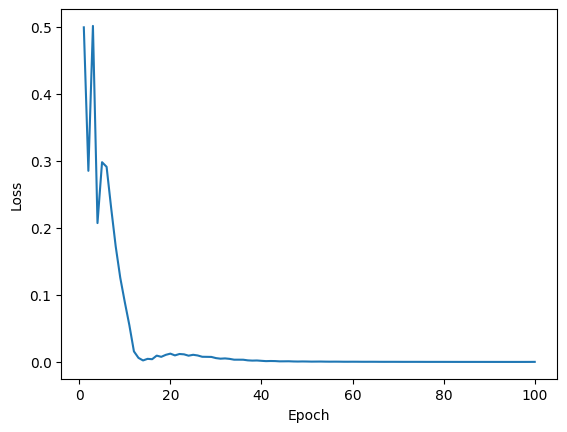

In [268]:
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")

## STEP 4. 모델 테스트하기

Text(0.5, 0.5, 'x2')

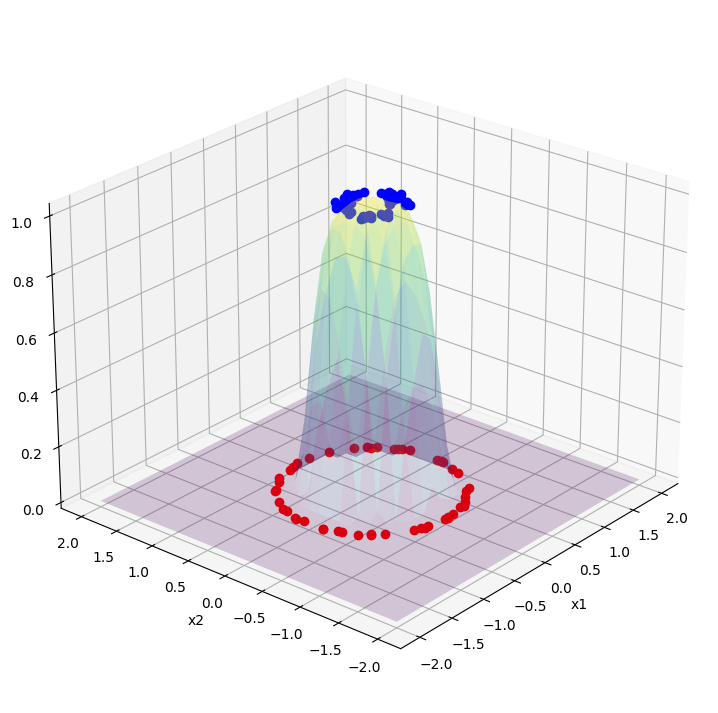

In [269]:
# x1_test=torch.linspace(-10,10,30) # case 1
# x2_test=torch.linspace(-10,10,30) # case 1
x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # test mode로 # 1. 해결
with torch.no_grad(): # 2. 해결
    y_hat=model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다
Y_hat = y_hat.squeeze()

# print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test,Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")



In [270]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)

In [271]:
list(model.parameters())


[Parameter containing:
 tensor([[ 0.5847,  0.0742],
         [-0.2846, -0.1195],
         [-0.5679,  0.2421],
         [-0.4625,  0.2775],
         [ 0.4840,  0.4046],
         [ 0.2165,  0.7582],
         [ 0.3607, -0.2227],
         [-0.4669, -0.5206],
         [ 0.6523,  0.3714],
         [-0.5135, -0.2129],
         [ 0.2119,  0.6130],
         [-0.5931, -0.1867],
         [-0.0971,  0.2677],
         [ 0.5758, -0.0947],
         [-0.4328,  0.1187],
         [ 0.0228, -0.1594],
         [-0.6078,  0.5824],
         [ 0.5732,  0.4527],
         [ 0.5017,  0.2274],
         [-0.4308,  0.1579],
         [-0.6299,  0.0608],
         [-0.2141,  0.4318],
         [ 0.2393,  0.1359],
         [-0.1631, -0.4700],
         [-0.0751,  0.0636],
         [ 0.5627,  0.7643],
         [-0.3940, -0.8174],
         [-0.7658,  0.6346],
         [-0.5569,  0.2946],
         [ 0.5288,  0.4443],
         [-0.6301, -0.8357],
         [-0.0843, -0.3459],
         [ 0.5593, -0.2710],
         [ 0.1783,  